In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import warnings

In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
X=df.drop('math_score',axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y=df['math_score']

In [19]:
num_colms=X.select_dtypes(exclude='object').columns
cat_colms=X.select_dtypes(include='object').columns

In [20]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer=ColumnTransformer(
    [
        ("One hot encoding ",OneHotEncoder(),cat_colms),
        ("Standard Scaler",StandardScaler(),num_colms)
    ]
)

In [22]:
X=transformer.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.29,random_state=15)

In [28]:
def evaluate_model(true,predicted):
    r2_sq=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    return r2_sq,mae,mse,rmse

In [29]:
models={
    "Linear Rigression": LinearRegression(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "SVM Regressor": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "XGBoost":XGBRegressor(),
    "Catboost": CatBoostRegressor(verbose=False),
    "KNN Regressor": KNeighborsRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    r2_train,mae_train,mse_train,rmse_train=evaluate_model(y_train,y_train_pred)
    r2_test,mae_test,mse_test,rmse_test=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training data")
    print("- R2 socre: {:.4f}".format(r2_train))
    print("- Mean sqaured error : {:.4f}".format(mse_train))
    print("- Root Mean sqaured error : {:.4f}".format(rmse_train))
    print("- Mean absolute error : {:.4f}".format(mae_train))
    
    print("------------------------------------")
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    print("- Mean sqaured error : {:.4f}".format(mse_test))
    r2_list.append(r2_test)
    
    print('='*35)
    print('\n')

Linear Rigression
Model performance for training data
- R2 socre: 0.8796
- Mean sqaured error : 28.4925
- Root Mean sqaured error : 5.3378
- Mean absolute error : 4.2695
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4677
- Mean Absolute Error: 4.3573
- R2 Score: 0.8572
- Mean sqaured error : 29.8954


Ridge
Model performance for training data
- R2 socre: 0.8807
- Mean sqaured error : 28.2233
- Root Mean sqaured error : 5.3126
- Mean absolute error : 4.2416
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3822
- Mean Absolute Error: 4.3082
- R2 Score: 0.8617
- Mean sqaured error : 28.9679


ElasticNet
Model performance for training data
- R2 socre: 0.7481
- Mean sqaured error : 59.5843
- Root Mean sqaured error : 7.7191
- Mean absolute error : 6.1515
------------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.6282
- Mean Absolute Error: 6.0837
- R2 Scor

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
1,Ridge,0.861652
0,Linear Rigression,0.857222
8,Catboost,0.833779
4,Random Forest,0.830842
6,Ada Boost,0.822762
7,XGBoost,0.790618
3,SVM Regressor,0.773854
9,KNN Regressor,0.759464
2,ElasticNet,0.722095
5,Decision Tree,0.677660


In [32]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Predicted points')

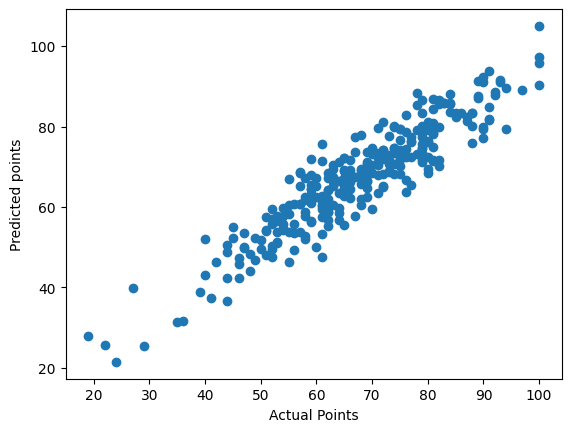

In [34]:
plt.scatter(y_test,lin_reg.predict(X_test))
plt.xlabel("Actual Points")
plt.ylabel("Predicted points")

In [35]:
import seaborn as sns

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='math_score'>

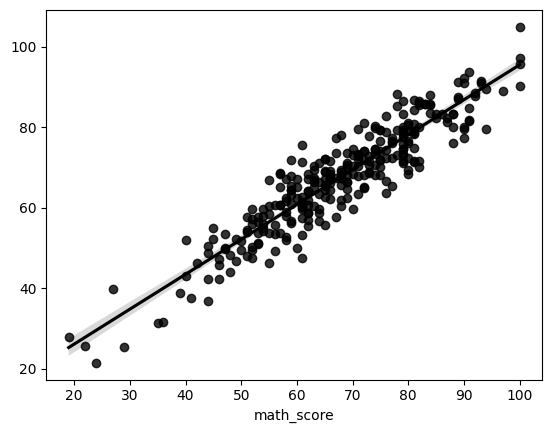

In [37]:
sns.regplot(x=y_test,y=lin_reg.predict(X_test),color='k')

In [39]:
pd.DataFrame({"Actual": y_test,"Predicted":lin_reg.predict(X_test),"Differencce":y_test-lin_reg.predict(X_test)})

,Actual,Predicted,Differencce
825,62,67.250,-5.250
374,59,64.500,-5.500
488,64,59.750,4.250
608,61,61.500,-0.500
42,53,56.500,-3.500
...,...,...,...
99,65,55.625,9.375
816,45,55.000,-10.000
172,79,75.750,3.250
856,75,68.125,6.875
